Cargar datos



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('btcusd_1-min_data.csv')

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index('Timestamp', inplace=True)

In [5]:
print(df.head())

                     Open  High   Low  Close  Volume
Timestamp                                           
2012-01-01 10:01:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:02:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:03:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:04:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:05:00  4.58  4.58  4.58   4.58     0.0


Limpieza de los datos cargados


In [7]:
df_clean = df.ffill()
print(df_clean.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


Creación de los graficos logarítmicos

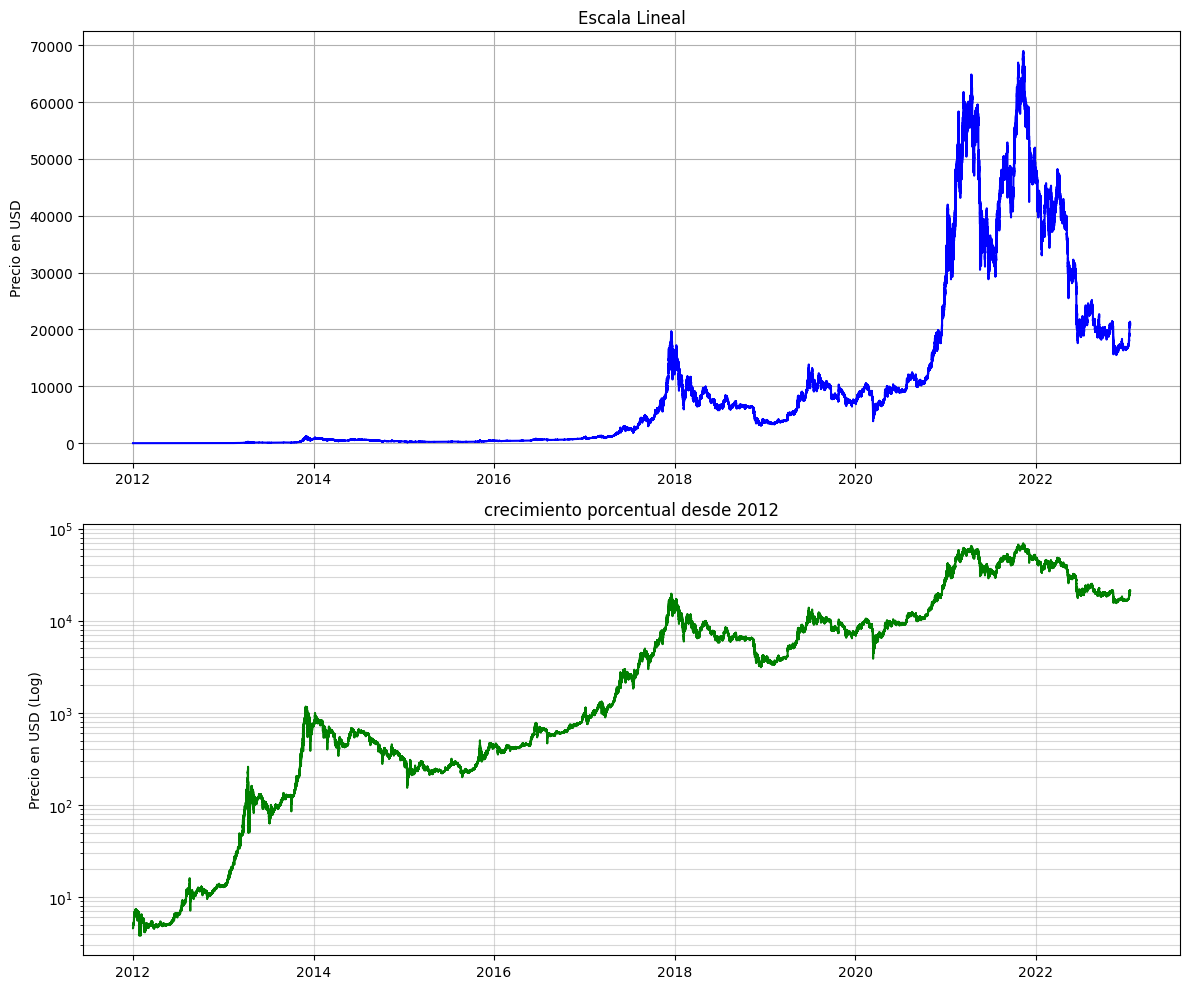

In [11]:
import matplotlib.pyplot as plt

# Crear una figura con dos gráficos (uno lineal y otro logarítmico)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico 1: Escala Lineal (La normal)
ax1.plot(df_clean['Close'], color='blue')
ax1.set_title('Escala Lineal')
ax1.set_ylabel('Precio en USD')
ax1.grid(True)

# Gráfico 2: Escala Logarítmica (La profesional)
ax2.plot(df_clean['Close'], color='green')
ax2.set_yscale('log') # Esta línea hace la magia
ax2.set_title('crecimiento porcentual desde 2012')
ax2.set_ylabel('Precio en USD (Log)')
ax2.grid(True, which="both", ls="-", alpha=0.5)

plt.tight_layout()
plt.show()

Analisis de datos mediante SQL

In [10]:
import sqlite3

conn = sqlite3.connect('bitcoin.db')

df_clean.to_sql('precios_bitcoin', conn, if_exists='replace')

query = """
SELECT Timestamp, Close
FROM precios_bitcoin
ORDER BY Close DESC
LIMIT 5
"""

top_precios = pd.read_sql(query, conn)
print("Top 5 Precios Históricos (desde SQL):")
print(top_precios)

Top 5 Precios Históricos (desde SQL):
             Timestamp     Close
0  2021-11-10 19:16:00  69000.00
1  2021-11-10 19:15:00  68799.99
2  2021-11-10 19:17:00  68780.71
3  2021-11-10 19:18:00  68733.68
4  2021-11-10 19:14:00  68720.65


Consulta promedio por año

In [12]:
# Consulta para promediar el precio por año
query_anual = """
SELECT strftime('%Y', Timestamp) AS Anio,
       AVG(Close) AS Precio_Promedio
FROM precios_bitcoin
GROUP BY Anio
ORDER BY Anio ASC
"""

# Cargar el resultado en un nuevo DataFrame
df_anual = pd.read_sql(query_anual, conn)

print("Análisis Anual de Bitcoin:")
print(df_anual)

Análisis Anual de Bitcoin:
    Anio  Precio_Promedio
0   2012         8.234715
1   2013       187.034192
2   2014       525.773139
3   2015       272.191506
4   2016       565.557293
5   2017      3941.622657
6   2018      7530.371791
7   2019      7350.824878
8   2020     11062.736906
9   2021     47376.462393
10  2022     28243.542735
11  2023     17822.562064
